<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/EDA_Lab_8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab Exercise 8

Download a Twitter dataset containing tweets about a specific brand or event.
- Utilize libraries like NLTK or TextBlob to perform sentiment analysis on the
tweets.
- Explore the distribution of positive, negative, and neutral sentiment. Identify
keywords or phrases associated with each sentiment category.

Load the Twitter dataset containing tweets about a specific brand or event (fields: tweet_id, airline_sentiment, text, etc.).

In [17]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Download required NLTK resources
nltk.download('punkt', force=True)  # Ensure punkt tokenizer is downloaded properly
nltk.download('stopwords', force=True)  # Ensure stopwords are downloaded properly

# Check the availability of the necessary resources
nltk.data.find('tokenizers/punkt')
nltk.data.find('corpora/stopwords')

# Load dataset (replace with your actual file path)
df = pd.read_csv("Tweets.csv")

# Clean missing values (drop rows with missing sentiment or text)
df.dropna(subset=['airline_sentiment', 'text'], inplace=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Perform sentiment analysis using the airline_sentiment column as the target sentiment, and explore how the distribution of sentiments (positive, negative, neutral) varies.

In [18]:
# Perform sentiment analysis on the 'text' column
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['calculated_sentiment'] = df['text'].apply(get_sentiment)
df['sentiment_label'] = df['calculated_sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Explore sentiment distribution
sentiment_distribution = df['sentiment_label'].value_counts()
print(sentiment_distribution)

sentiment_label
neutral     5494
positive    5477
negative    3669
Name: count, dtype: int64


Exploring Sentiment Distribution:

We plot a bar chart using seaborn to visualize the distribution of sentiments in the dataset.

<ipython-input-19-8209eb402729>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette="Set2")


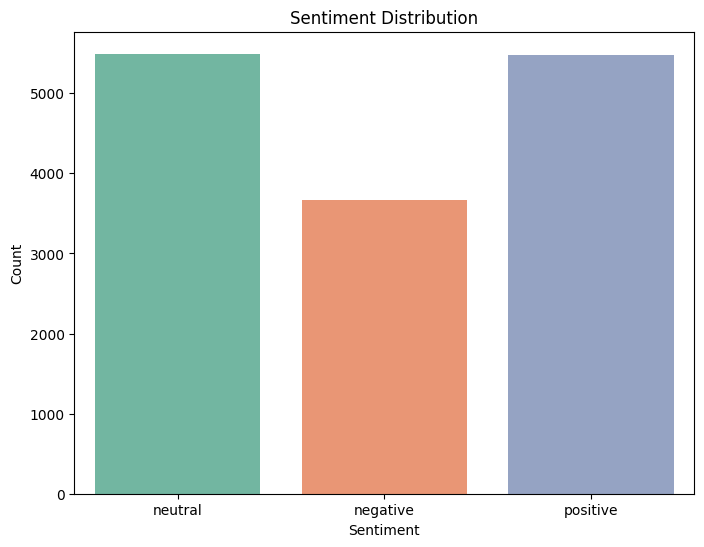

In [19]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Identify
keywords or phrases associated with each sentiment category.

In [20]:
# Identify keywords (top frequent words) for each sentiment
def get_top_words(text_series, n=10):
    text = " ".join(text_series).lower()
    words = [word for word in text.split() if word.isalpha() and word not in stopwords.words('english')]
    return Counter(words).most_common(n)

print("\nTop words in Positive Tweets:")
print(get_top_words(df[df['sentiment_label'] == 'positive']['text']))

print("\nTop words in Negative Tweets:")
print(get_top_words(df[df['sentiment_label'] == 'negative']['text']))

print("\nTop words in Neutral Tweets:")
print(get_top_words(df[df['sentiment_label'] == 'neutral']['text']))



Top words in Positive Tweets:
[('flight', 1039), ('thanks', 619), ('get', 450), ('thank', 304), ('would', 284), ('fly', 282), ('cancelled', 277), ('great', 261), ('service', 251), ('customer', 242)]

Top words in Negative Tweets:
[('flight', 987), ('late', 341), ('get', 339), ('cancelled', 303), ('customer', 286), ('service', 273), ('hours', 206), ('worst', 195), ('due', 175), ('still', 168)]

Top words in Neutral Tweets:
[('flight', 1191), ('get', 540), ('cancelled', 467), ('hold', 276), ('thank', 257), ('still', 248), ('need', 248), ('please', 243), ('help', 241), ('us', 211)]


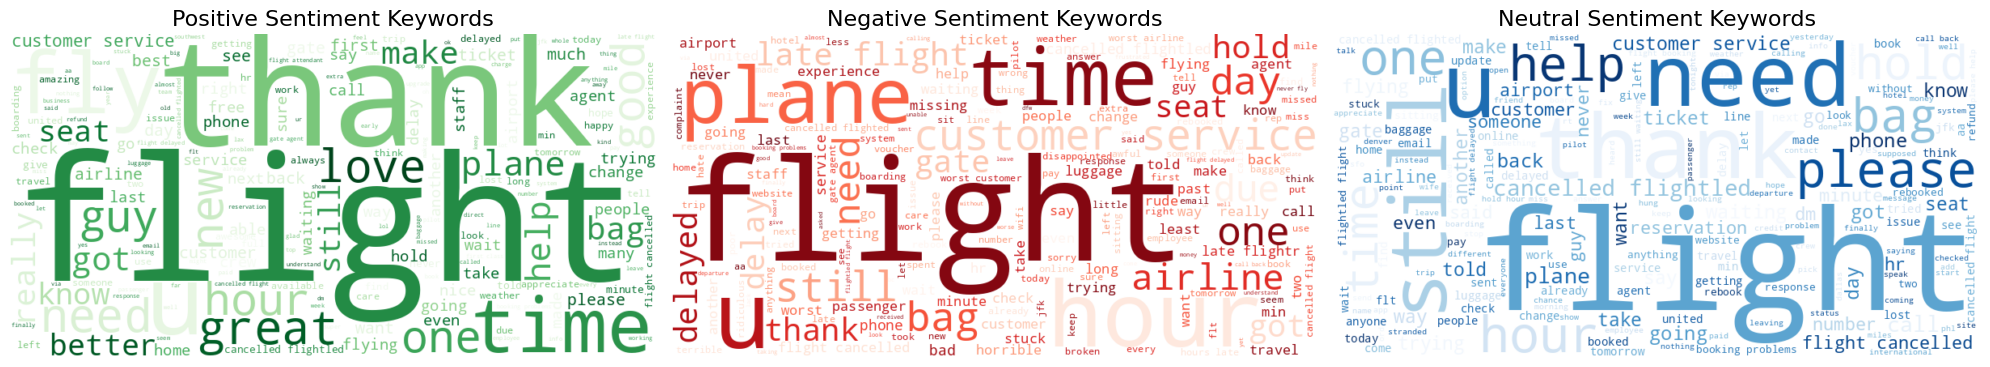

In [15]:
# Preprocessing function using simple split instead of word_tokenize
def preprocess_text(text):
    words = text.lower().split()
    stop_words = set(stopwords.words('english'))
    cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]
    return cleaned_words

# Create text corpus for each sentiment
positive_text = " ".join(df[df['sentiment_label'] == 'positive']['text'])
negative_text = " ".join(df[df['sentiment_label'] == 'negative']['text'])
neutral_text = " ".join(df[df['sentiment_label'] == 'neutral']['text'])

# Preprocess the text
positive_words = preprocess_text(positive_text)
negative_words = preprocess_text(negative_text)
neutral_words = preprocess_text(neutral_text)

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(" ".join(positive_words))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(" ".join(negative_words))
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(" ".join(neutral_words))

# Plot the word clouds
plt.figure(figsize=(20, 12))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Sentiment Keywords", fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Sentiment Keywords", fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title("Neutral Sentiment Keywords", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()